# Linear classification

## 1. unit

In [0]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

x_train =[202.6183, 200.0614, 199.0766, 197.1534, 197.5498, 197.237 ]
y_train= [ 94.03061, 108.9159 , 123.1589 , 137.2437 , 151.315  , 164.3793 ]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
  
  if step%10000 == 0:
    print(step, cost_val, W_val, b_val)

0 1757.9865 [0.50061417] [-0.8136271]
10000 637.017 [0.6555438] [-0.80808234]


## 2. multi

In [0]:
# matrix 없이
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1*w1 + x2*w2 + x3*w3 + b

cost = tf.reduce_mean(tf.square(hypothesis-y))
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, y:y_data})
  
  if step%10000==0:
    print(step, "Cost: ",cost_val, "\nPrediction:", hy_val,"\n")

0 Cost:  39564.0 
Prediction: [-23.07097  -28.361422 -27.178469 -34.84842  -17.477777] 

10000 Cost:  2.8719635 
Prediction: [152.99635 183.9482  181.582   193.46118 143.82002] 



In [0]:
# matrix 사용
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape=[None,3])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  cost_val, hy_val, _ = sess.run(
      [cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
  
  if step%10000==0:
    print(step, "Cost: ",cost_val, "\nPrediction:", hy_val,"\n")

0 Cost:  21.107025 
Prediction: [[154.49529]
 [179.40346]
 [179.86642]
 [197.54999]
 [133.90265]] 

10000 Cost:  1.4106073 
Prediction: [[150.94534]
 [184.81314]
 [180.2107 ]
 [197.88152]
 [140.47641]] 



### 과제: 배추가격 예측 AI로봇 만들기

In [0]:
from google.colab import drive
import os
import numpy as np
from pandas.io.parsers import read_csv

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
  
else:
  print('Google Drive is already mounted\n')
  

  
if os.path.exists('/content/gdrive/My Drive/Colab Notebooks/price_data_yk.csv')==False:
  print('Train data downloading..')
  ! curl 'https://raw.githubusercontent.com/unizard/2019.Spring.AI/master/price_data_yk.csv' -o '/content/gdrive/My Drive/Colab Notebooks/price_data_yk.csv'
  print('Done..\n')
else:
  print('File already exists \n')
    
# 학습데이터 로딩
data = read_csv('/content/gdrive/My Drive/Colab Notebooks/price_data_yk.csv',sep=',')
xy = np.array(data, dtype=np.float32)

x_data = xy[:, 1:-1] # year, avgPrice 제외
y_data = xy[:, [-1]] #avgPrice만 가져오기

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.000005).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('=========================================')
print(' 학습 시작')
print('=========================================')

for step in range(100001):
  cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data,Y:y_data})
  if step%100000 == 0:
    print("#", step, " 손실비용: ", cost_)
    print("-배추 가격: ", hypo_[0])

print('=========================================')
print(' 학습 끝')
print('=========================================')




# 오늘의 날짜를 파일 이름으로 활용할 예정이었으나, 여러분의 혼란을 줄이고자 주석처리함
# 오늘의 날짜를 사용하기 위한 라이브러리 import
import datetime
# 학습 모델 저장을 위한 그래프 설정
saver = tf.train.Saver()

# 학습 모델 이름 설정
#strTLog = datetime.date.today().strftime("%Y%m%d")  
path = '/content/gdrive/My Drive/Colab Notebooks/saved.cpkt'

# 학습 모델 저장
save_path = saver.save(sess,path)
print('학습된 모델을 저장했습니다.')


Google Drive is already mounted

File already exists 

 학습 시작
# 0  손실비용:  12697070.0
-배추 가격:  [9.314626]
# 100000  손실비용:  2228358.5
-배추 가격:  [2584.6968]
 학습 끝
학습된 모델을 저장했습니다.


In [0]:
from google.colab import drive

import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

  
X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,1])

hypothesis = tf.matmul(X,W) + b

avg_temp=float(input('평균온도: '))
min_temp=float(input('최저온도: '))
max_temp=float(input('최고온도: '))
rain_fall=float(input('강수량: '))

saver = tf.train.Saver()
model = tf.global_variables_initializer()

with tf.Session() as sess:
    
    # 그래프 연결
    sess.run(model)
    
    # 학습 모델 로드
    save_path = '/content/gdrive/My Drive/Colab Notebooks/saved.cpkt'
    saver.restore(sess, save_path)
    
    # 모델에 넣을 입력데이터 가공
    data = ((avg_temp, min_temp, max_temp, rain_fall), (0, 0, 0, 0))
    arr = np.array(data, dtype=np.float32)
    x_data = arr[0:4]
    print(x_data[0])
    
    # 평균온도, 최대온도, 최저온도, 강수량으로 배추가격 예측을 위해 세션 실행
    predict = sess.run(hypothesis, feed_dict={X: x_data})
    print(predict[0])

Google Drive is already mounted

평균온도: -2.7
최저온도: -6.6
최고온도: 2.
강수량: .1
INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/Colab Notebooks/saved.cpkt
[-2.7 -6.6  2.   0.1]
[2000.4777]


# Linear Regression

In [6]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



## 1. Binary classification
* 학습/테스트의 데이터는 같음
* hypothesis: _Sigmoid_ 사용

<br>
x_data = [[1, 2],[2, 3],[3, 1],[4, 3],[5, 3],[6, 2]]  
y_data = [[0],[0],[0],[1],[1],[1]]

In [3]:
import tensorflow as tf

tf.set_random_seed(777)

x_data = [[1, 2],[2, 3],[3, 1],[4, 3],[5, 3],[6, 2]]
y_data = [[0],[0],[0],[1],[1],[1]]

X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)


predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
  cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
  if step%1000==0:
    print(step,cost_val)

fin_hyp, fin_prd, fin_acr = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data,Y:y_data})
print("\nHypothesis: \n", fin_hyp, "\nCorrect (Y): \n", fin_prd, "\nAccuracy: \n", fin_acr)

0 3.0963078
1000 0.49478617
2000 0.41475156
3000 0.35225573
4000 0.30352256
5000 0.2652935
6000 0.23493777
7000 0.21047556
8000 0.19046216
9000 0.17384946
10000 0.15987395

Hypothesis: 
 [[0.03522347]
 [0.16451049]
 [0.32564858]
 [0.7720432 ]
 [0.9335378 ]
 [0.97816443]] 
Correct (Y): 
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy: 
 1.0


## 2. 당뇨병 환자를 판별하는 AI머신 만들기

In [14]:
import tensorflow as tf
import numpy as np
import os

tf.set_random_seed(777)

if os.path.exists('/contents/gdrive/My Drive/Colab Notebooks/diabetes.csv')==False:
  print('Train data downloading..')
  ! curl 'https://raw.githubusercontent.com/unizard/2019.Spring.AI/master/diabetes.csv' -o '/contents/gdrive/My Drive/Colab Notebooks/diabetes.csv'
  print('Done..\n')
else:
  print('File already exists\n')
  
xy = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/diabetes.csv', delimiter=',', dtype=np.float32)

x_data = xy[:,0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None,8])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([8,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W)+b)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(hypothesis, Y), dtype=tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("-------------------------------------------")
print(" Loss values tracing ")
print("-------------------------------------------")
for step in range(10001):
  cost_val, _ = sess.run([cost,train], feed_dict={X:x_data, Y:y_data})
  if step%1000 == 0:
    print(step, cost_val)

print("-------------------------------------------")

print(tf.concat([hypothesis, predicted], 0))
Rst_hypothesis, Rst_predict, Rst_accuracy = sess.run([hypothesis, predicted, accuracy],feed_dict={X: x_data, Y: y_data})
print("\nHypothesis: ", Rst_hypothesis, "\nCorrect (Y): ", Rst_predict, "\nAccuracy: ", Rst_accuracy)
print([Rst_hypothesis, Rst_predict, Rst_accuracy])

Train data downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file /contents/gdrive/My Drive/Colab 
  3 54197    3  1920    0     0  29090      0  0:00:01 --:--:--  0:00:01 29090
curl: (23) Failed writing body (0 != 1920)
Done..

-------------------------------------------
 Loss values tracing 
-------------------------------------------
0 0.73323053
1000 0.62040526
2000 0.5610019
3000 0.5287101
4000 0.510097
5000 0.49869546
6000 0.49133366
7000 0.48637122
8000 0.48290807
9000 0.48042235
10000 0.47859657
-------------------------------------------
Tensor("concat_1:0", shape=(?, 1), dtype=float32)

Hypothesis:  [[0.41140026]
 [0.93318105]
 [0.27762294]
 [0.9284421 ]
 [0.18833327]
 [0.78313506]
 [0.9322443 ]
 [0.6102789 ]
 [0.2190769 ]
 [0.52008545]
 [0.68870854]

## 3. Multinomial Classification

* 클래스 3개인 데이터 학습
* 1번 클래스: [1, 0 0], 2번 클래스: [0,1,0], 3번 클래스: [0,0,1] 로 표기

In [15]:
import tensorflow as tf

tf.set_random_seed(777)

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]
nb_classes = 3

X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,3])

W = tf.Variable(tf.random_normal([4,nb_classes]),name='weight')
b = tf.Variable(tf.random_normal([nb_classes]),name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
  if step%1000==0:
    print(step,cost_val)
    
print('--------------')
# Testing & One-hot encoding
a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
print(a, sess.run(tf.argmax(a, 1)))

print('--------------')
b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
print(b, sess.run(tf.argmax(b, 1)))

print('--------------')
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, sess.run(tf.argmax(c, 1)))

print('--------------')
all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all, sess.run(tf.argmax(all, 1)))

Instructions for updating:
Use tf.cast instead.
0 5.238928
1000 0.2668044
2000 0.16057643
--------------
[[1.6168805e-02 9.8382288e-01 8.3161503e-06]] [1]
--------------
[[0.76160705 0.21634768 0.02204525]] [0]
--------------
[[1.5344991e-08 3.2354318e-04 9.9967647e-01]] [2]
--------------
[[1.6168805e-02 9.8382288e-01 8.3161513e-06]
 [7.6160705e-01 2.1634768e-01 2.2045251e-02]
 [1.5344991e-08 3.2354321e-04 9.9967647e-01]] [1 0 2]


## 4. 동물 판별하는 분류기 만들기

- Zoo 데이터 <br>
  - Row: 동물 하나의 데이터
  - 1~16: 특성데이터, 17: 동물 클래스 번호

![캡처](https://user-images.githubusercontent.com/11758940/55483288-402cb900-5661-11e9-82e8-040724eccfb9.PNG)


In [20]:
import tensorflow as tf
import numpy as np
import os

tf.set_random_seed(777)

if os.path.exists('/content/gdrive/My Drive/Colab Notebooks/data-zoo-v2.csv')==False:
    print('Train data downloading..')
    ! curl 'https://raw.githubusercontent.com/unizard/2019.Spring.AI/master/data-zoo-v2.csv' -o '/content/gdrive/My Drive/Colab Notebooks/data-zoo-v2.csv'
    print('Done..\n')
else:
    print('File already exists \n')
    
    
xy = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/data-zoo-v2.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# 학습 데이터 사이즈 확인
print(x_data.shape, y_data.shape)

# 학습 데이터 클래스 설정
nb_classes = 7 # 0~6

X = tf.placeholder(tf.float32, [None,16])
Y = tf.placeholder(tf.int32, [None,1]) # 0~6

# 변환에 주의할 것

# one-hot(원핫)인코딩이란? 단 하나의 값만 True이고 나머지는 모두 False인 인코딩을 말한다.
# 즉, 1개만 Hot(True)이고 나머지는 Cold(False)이다.
# 예를들면 [0, 0, 0, 0, 1]이다. 5번째(Zero-based 인덱스이므로 4)만 1이고 나머지는 0이다.
# 행렬을 자주 사용하는 연산에서는 4와 같은 스칼라값보다 [0, 0, 0, 0, 1]와 같은 행렬이 자주 사용된다.
'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)


# 학습 파라미터 초기화
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')



# 가설 함수 그래프 설정
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)



# 비용 함수 그래프 설정, Cross Entropy 로 설정
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=tf.stop_gradient([Y_one_hot])))


# 최적화 함수 설정(경사하강법)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)



# 예측 그래프, 
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




# 세션 생성 및 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 세션 실행
for step in range(2001):
    # 실행하면서 비용함수와 정확도 출력
    _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

        
        
# 예측값과 정답을 함께 출력하기
cnt = 0
pred = sess.run(prediction, feed_dict={X: x_data})
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    cnt = cnt + 1
        
# 최종 정확도 출력 
print("Accuracy: ", cnt/pred.size*100)

File already exists 

(101, 16) (101, 1)
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Step:     0	Cost: 6.993	Acc: 2.97%
Step:   100	Cost: 0.771	Acc: 83.17%
Step:   200	Cost: 0.479	Acc: 86.14%
Step:   300	Cost: 0.354	Acc: 88.12%
Step:   400	Cost: 0.282	Acc: 89.11%
Step:   500	Cost: 0.234	Acc: 93.07%
Step:   600	Cost: 0.199	Acc: 95.05%
Step:   700	Cost: 0.173	Acc: 96.04%
Step:   800	Cost: 0.153	Acc: 99.01%
Step:   900	Cost: 0.137	Acc: 99.01%
Step:  1000	Cost: 0.123	Acc: 99.01%
Step:  1100	Cost: 0.112	Acc: 99.01%
Step:  1200	Cost: 0.103	Acc: 99.01%
Step:  1300	Cost: 0.095	Acc: 99.01%
Step:  1400	Cost: 0.088	Acc: 99.01%
Step:  1500	Cost: 0.081	Acc: 100.00%
Step:  1600	Cost: 0.076	Acc: 100.00%
Step:  1700	Cost: 0.071	Acc: 100.00%
Step:  1800	Cost: 0.067	Acc: 100.00%
Step:  1900	Cost: 0.063	Acc: 100.00%
Step:  2000	Cost: 0.060	Acc: 100.00%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Pr

## 파이썬으로 Gradient Descent Algorithm 작성하기


### 과제 방법

gradient_descent 함수를 완성하시오.

반드시 스스로 직접! 해보세요.


In [0]:
from numpy import *
import os

def gradient_descent(points, starting_b, starting_m, learning_rate, num_iterations):

    #
    # 본 함수를 완성하시오.
    #   
    b = starting_b
    m = starting_m
    n=len(points[:,1])
    
    #맨 왼쪽에 행 순서 나온거 빼고 활용하기
    for i in range(num_iterations):
        pred = dot(points[:,0],m)+b
        m = m-(1/n)*learning_rate*(points[:,0].T.dot(pred-points[:,1])) 
        b = b-learning_rate*(mean(pred-points[:,1]))
        
        # 확인용
        #if i%200 == 0:
          #print('b={}, m={}'.format(m,b))
          
    return [b, m]

In [26]:
# 학습 데이터 다운로드
if os.path.exists('20190407_data.csv')==False:
    print('Train data downloading..')
    ! curl 'https://raw.githubusercontent.com/unizard/2019.Spring.AI/master/20190407_data.csv' -o './20190407_data.csv'        
    print('Done..\n')
else:
    print('File already exists \n')
    



def run():
    points = genfromtxt("20190407_data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    print("========================")
    print(" Start")    
    print("========================")
    [b, w] = gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)
    print("b=",b)
    print("w=",w)

    
    
    
if __name__ == '__main__':
    run()

Train data downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3778  100  3778    0     0  25019      0 --:--:-- --:--:-- --:--:-- 25186
Done..

 Start
b= 0.0590585566421608
w= 1.4783313274545458


# Neural Network

## Multinomial Classification 문제를 해결하기 위해 적절한  Learning Rate 를 찾아봅시다.


### 1) 직접 코드를 이해하여 주석을 달아 제출
- 주석을 달면서 이해가 안가는 부분 조교에게 질문

### 2) Learning rate 를 찾아보세요
-  1.5 => 1e-10 => 0.1 순으로 변경해보자. 
- 아래의 ?? 부분에 learning rate 값을 넣으면 된다.
  - optimizer = tf.train.GradientDescentOptimizer(learning_rate=???).minimize(cost)



In [22]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# 학습용 데이터 셋
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# 평가용 데이터 셋
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]



X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))


hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))



with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))



0 1.8452613 [[ 1.2201109  -0.08175069  2.4965332 ]
 [-0.538348    0.5975348  -0.0965065 ]
 [ 0.25963336 -0.3803388  -1.0953832 ]]
1 1.444674 [[ 1.2146817  -0.10198049  2.522192  ]
 [-0.47274482  0.46078247 -0.02535737]
 [ 0.29014668 -0.47929475 -1.0269406 ]]
2 1.1974428 [[ 1.1877325  -0.09614011  2.5433009 ]
 [-0.5269472   0.4593837   0.0302438 ]
 [ 0.20187968 -0.4471972  -0.97077113]]
3 1.0831964 [[ 1.1775916  -0.10163492  2.5589366 ]
 [-0.49481368  0.3917533   0.06574073]
 [ 0.19925658 -0.48155499 -0.93379027]]
4 1.028961 [[ 1.1607196  -0.09504925  2.569223  ]
 [-0.5042182   0.39104912  0.07584946]
 [ 0.15627731 -0.45296267 -0.9194033 ]]
5 1.0074649 [[ 1.1513671  -0.09360686  2.5771332 ]
 [-0.47481784  0.36099392  0.07650428]
 [ 0.15298285 -0.45393422 -0.9151373 ]]
6 0.9924283 [[ 1.1388111  -0.0879785   2.584061  ]
 [-0.46417865  0.3551377   0.07172132]
 [ 0.13153465 -0.43217418 -0.91544914]]
7 0.9789294 [[ 1.1286358  -0.08482663  2.5910842 ]
 [-0.4413602   0.33565837  0.06838222]
 [

## 입력 데이터의 정규화의 유무에 따른 모델 학습 성공 유무 확인하기

### 1) 코드에 주석을 달아 제출하세요

### 2) 데이터 정규화 유무에 따른 모델 학습의 결과를 서술하여 제출하세요.

- 입력데이터의 feature 별 값의 스케일 차가 크면, 학습이 이루어지지 않고 발산하기 쉽다. <br> [??] 부분에 xy = min_max_scaler(xy)  코드 넣어, 안정적으로 모델이 학습되는 것을 확인한다.

In [23]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])


# very important. It does not work without it.
# very important. It does not work without it.
# 이 코드를 그대로 돌리면 발산하여 nan값이 나온다.
# 따라서 우리는 데이터를 정규화할 필요가 있다.(모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정)
def min_max_scaler(data):
    numerator = data - np.min(data, 0) # 분자
    denominator = np.max(data, 0) - np.min(data, 0) # 분모
    return numerator / (denominator + 1e-7)
  
xy = min_max_scaler(xy) # xy값을 정규화


x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]



X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)




0 Cost:  0.25993007 
Prediction:
 [[-0.07906365]
 [ 1.2109591 ]
 [ 0.6404447 ]
 [ 0.07747714]
 [ 0.24732162]
 [ 0.28449512]
 [ 0.12401056]
 [ 0.7523401 ]]
1 Cost:  0.25992706 
Prediction:
 [[-0.0790532 ]
 [ 1.2109658 ]
 [ 0.6404505 ]
 [ 0.07748213]
 [ 0.24732745]
 [ 0.28450063]
 [ 0.12401322]
 [ 0.75234145]]
2 Cost:  0.25992408 
Prediction:
 [[-0.07904274]
 [ 1.2109722 ]
 [ 0.6404564 ]
 [ 0.0774871 ]
 [ 0.24733335]
 [ 0.28450614]
 [ 0.12401588]
 [ 0.7523429 ]]
3 Cost:  0.25992107 
Prediction:
 [[-0.07903228]
 [ 1.2109787 ]
 [ 0.6404622 ]
 [ 0.0774921 ]
 [ 0.24733923]
 [ 0.28451163]
 [ 0.12401852]
 [ 0.7523443 ]]
4 Cost:  0.25991803 
Prediction:
 [[-0.07902182]
 [ 1.2109853 ]
 [ 0.6404681 ]
 [ 0.07749707]
 [ 0.24734506]
 [ 0.28451708]
 [ 0.12402119]
 [ 0.7523457 ]]
5 Cost:  0.259915 
Prediction:
 [[-0.07901137]
 [ 1.2109919 ]
 [ 0.64047384]
 [ 0.07750206]
 [ 0.24735099]
 [ 0.2845226 ]
 [ 0.12402383]
 [ 0.75234705]]
6 Cost:  0.259912 
Prediction:
 [[-0.07900091]
 [ 1.2109985 ]
 [ 0.64047

## mnist 데이터 셋으로 손글씨 데이터 분류하기


- 입력데이터는 28x28 영상 데이터를 784차원의 1차원 백터로 사용
- 출력데이터는 숫자 정답

### 1) 손글씨 데이터 정확도 올리기? 어떻게?
- parameters인 num_epochs와 batch_size를 변경해보자!!
  - num_epochs = 50, batch_size = 100

### 2) 손글씨 데이터 정확도 올리기? 아이디어 있으면 고고!




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

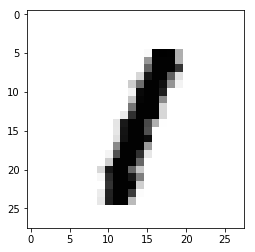

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))



# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)



# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)


# 배치란?
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
